1) Spot-futures parity
    1.1) Получить данные котировок (исторические/лайв)
        1.1.1) Измерить доходность и риск активов
    1.2) Получить данные фьючерсов (исторические/лайв)
    1.3) Получить данные T-bills
    1.4) Рассчитать профит с учетом срока до экспирации и комиссий

2) Отработка спрэдов на криптобирже

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels
import seaborn as sns
import scipy

from QuikPy import QuikPy
from techfunc import *

In [2]:
qp_provider = QuikPy()

In [34]:
moexf = qp_provider.get_candles_from_data_source('SPBFUT', 'IMOEXF', 5)
brx4 = qp_provider.get_candles_from_data_source('SPBFUT', 'BRX4', 5)
sber = qp_provider.get_candles_from_data_source('TQBR', 'SBER', 5)
gazp = qp_provider.get_candles_from_data_source('TQBR', 'GAZP', 5)

moexf = collectdatequik(moexf)[::-1].reset_index(drop=True)
brx4 = collectdatequik(brx4)[::-1].reset_index(drop=True)
sber = collectdatequik(sber)[::-1].reset_index(drop=True)
gazp = collectdatequik(gazp)[::-1].reset_index(drop=True)

dfclose = pd.DataFrame()
dfclose['imoexf'] = moexf[:200:-1].close/10
dfclose['brx4'] = brx4[:200:-1].close*3.5
dfclose['sber'] = sber[:200:-1].close
dfclose['gazp'] = gazp[:200:-1].close*2

In [42]:
brx4[::-1].reset_index()

,index,volume,class,low,sec,interval,close,open,high,date
0,3050,670.0,SPBFUT,75.55,BRX4,5,75.61,75.55,75.63,2024-10-03 14:10:00
1,3049,1451.0,SPBFUT,75.46,BRX4,5,75.54,75.46,75.54,2024-10-03 14:05:00
2,3048,641.0,SPBFUT,75.43,BRX4,5,75.46,75.45,75.49,2024-10-03 13:55:00
3,3047,894.0,SPBFUT,75.39,BRX4,5,75.46,75.39,75.47,2024-10-03 13:50:00
4,3046,2131.0,SPBFUT,75.35,BRX4,5,75.38,75.46,75.46,2024-10-03 13:45:00
...,...,...,...,...,...,...,...,...,...,...
3046,4,1233.0,SPBFUT,72.38,BRX4,5,72.45,72.71,72.89,2024-09-06 17:40:00
3047,3,492.0,SPBFUT,72.50,BRX4,5,72.69,72.60,72.77,2024-09-06 17:35:00
3048,2,1551.0,SPBFUT,72.61,BRX4,5,72.61,72.92,72.95,2024-09-06 17:30:00
3049,1,726.0,SPBFUT,72.93,BRX4,5,72.93,73.20,73.25,2024-09-06 17:25:00


<Axes: >

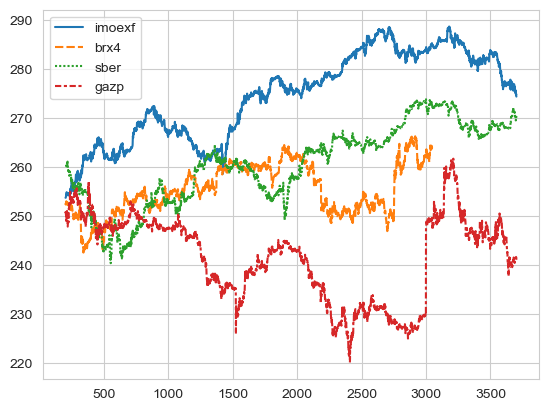

In [36]:
sns.set_style('whitegrid')
sns.lineplot(dfclose)

In [35]:
dfclose.corr()

,imoexf,brx4,sber,gazp
imoexf,1.000000,0.295796,0.740803,-0.370663
brx4,0.295796,1.000000,0.395971,-0.255562
sber,0.740803,0.395971,1.000000,-0.360071
gazp,-0.370663,-0.255562,-0.360071,1.000000
